In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import csv





    

In [17]:
trainxs = []
trainys = []
trainxs2 =[]
with open("/home/jupyter/MEng-Project/insight46labels.csv", newline='') as csvfile:
    data = list(csv.reader(csvfile))
    trainystr = data[0]
trainys = [int(i) for i in trainystr]
#print(trainys)

In [18]:
path = "/home/jupyter/MEng-Project/insight46png"
for img in tqdm(sorted(os.listdir(path))):  # iterate over each image per point value
    img_array = cv2.imread(os.path.join(path,img) ,0)  # convert to array
    img_array = cv2.resize(img_array, (300, 300))
    img_array = cv2.bitwise_not(img_array)
    #kernel = np.ones((5,5),np.uint8)
    #erosion = cv2.dilate(img_array,kernel,iterations = 1)
    trainxs.append(img_array)  # add this to our training_data
#trainxs = np.array(trainxs, dtype="float") / 255.0
#trainys = np.array(trainys)

100%|██████████| 991/991 [00:04<00:00, 223.54it/s]


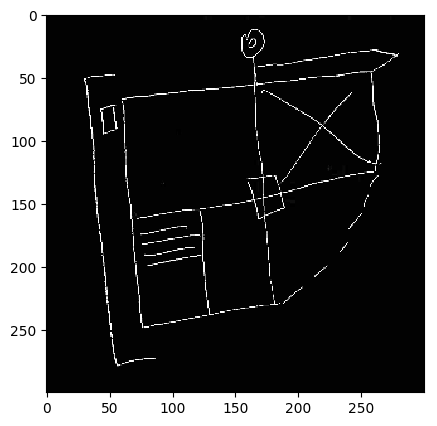

In [19]:
plt.imshow(trainxs[1], "gray")

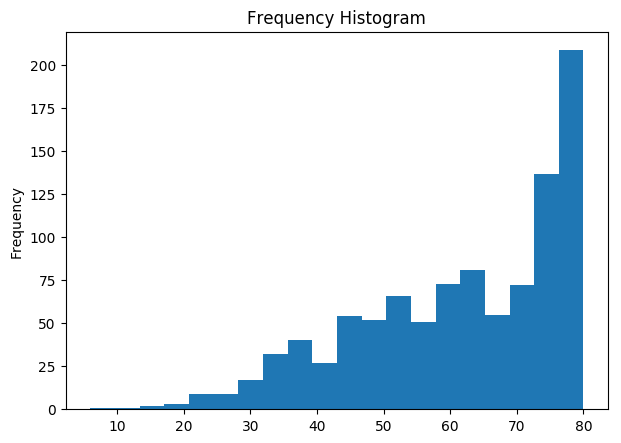

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(trainys, bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [21]:
'''
for i,y in enumerate(trainys):
    if trainys[i] > 75:
        trainys[i] = 3
    elif trainys[i] <=75 and trainys[i] >55:
        trainys[i] = 2
    #elif trainys[i] <=40 and trainys[i] >20:
    #    trainys[i] = 1
    else:
        trainys[i] = 0

'''

'\nfor i,y in enumerate(trainys):\n    if trainys[i] > 75:\n        trainys[i] = 3\n    elif trainys[i] <=75 and trainys[i] >55:\n        trainys[i] = 2\n    #elif trainys[i] <=40 and trainys[i] >20:\n    #    trainys[i] = 1\n    else:\n        trainys[i] = 0\n\n'

In [22]:
for i,y in enumerate(trainys):
    if trainys[i] > 54:
        trainys[i] = 2
    elif trainys[i] <=54 and trainys[i] >28:
        trainys[i] = 1
    #elif trainys[i] <=40 and trainys[i] >20:
    #    trainys[i] = 1
    else:
        trainys[i] = 0


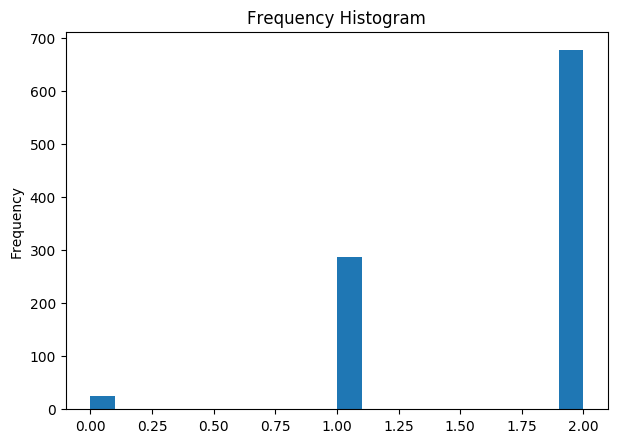

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(trainys, bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

Using TensorFlow backend.


[1. 0. 0.]


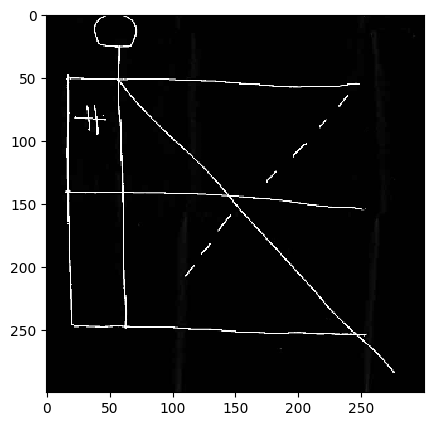

In [24]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

batch_size = 128
epochs = 10

# input image dimensions
img_rows, img_cols = 300, 300


import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import csv
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import rotate
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
np.set_printoptions(threshold=np.inf)


trainxs1 = np.asarray(trainxs, dtype=np.float32)
trainys1 = np.asarray(trainys, dtype=np.int)
#print(trainys)



x_train, x_test, y_train_old, y_test_old = train_test_split(trainxs1, trainys1, test_size=0.08, random_state=40)
y_train = to_categorical(y_train_old)
y_test = to_categorical(y_test_old)
#print(y_train)
plt.imshow(x_test[2], cmap='gray')
print(y_test[2])



In [25]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train.shape

(911, 300, 300, 1)

In [26]:
print('x_train shape:', x_train.shape)
x_train = np.array(x_train)
x_test = np.array(x_test)

#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(AveragePooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(356, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

x_train shape: (911, 300, 300, 1)
y_train shape: (911, 3)
911 train samples
80 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
average_pooling2d_1 (Average (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 341056)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               87310592  
____________________________

In [27]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 911 samples, validate on 80 samples
Epoch 1/10
911/911 [==============================] - 9s 10ms/step - loss: 0.8805 - accuracy: 0.5950 - val_loss: 0.7555 - val_accuracy: 0.6250
Epoch 2/10
911/911 [==============================] - 5s 5ms/step - loss: 0.6631 - accuracy: 0.6981 - val_loss: 0.6621 - val_accuracy: 0.6375
Epoch 3/10
911/911 [==============================] - 5s 5ms/step - loss: 0.5909 - accuracy: 0.7453 - val_loss: 0.6407 - val_accuracy: 0.6875
Epoch 4/10
911/911 [==============================] - 5s 5ms/step - loss: 0.5382 - accuracy: 0.7662 - val_loss: 0.6129 - val_accuracy: 0.8000
Epoch 5/10
911/911 [==============================] - 5s 5ms/step - loss: 0.5286 - accuracy: 0.8002 - val_loss: 0.8465 - val_accuracy: 0.7000
Epoch 6/10
911/911 [==============================] - 5s 5ms/step - loss: 0.4903 - accuracy: 0.7903 - val_loss: 0.5851 - val_accuracy: 0.8375
Epoch 7/10
911/911 [==============================] - 5s 5ms/step - loss: 0.4464 - accuracy: 0.8255 - 

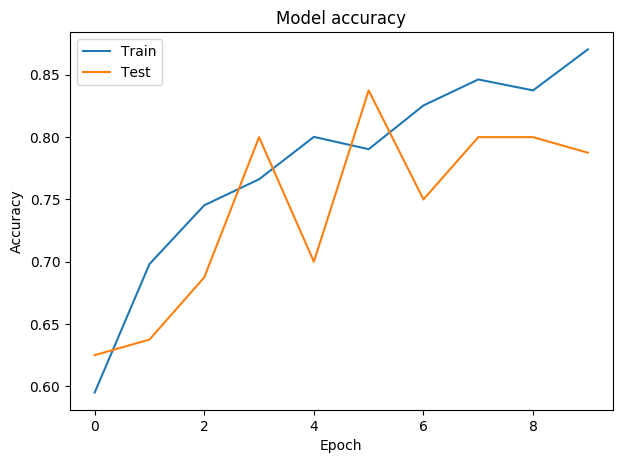

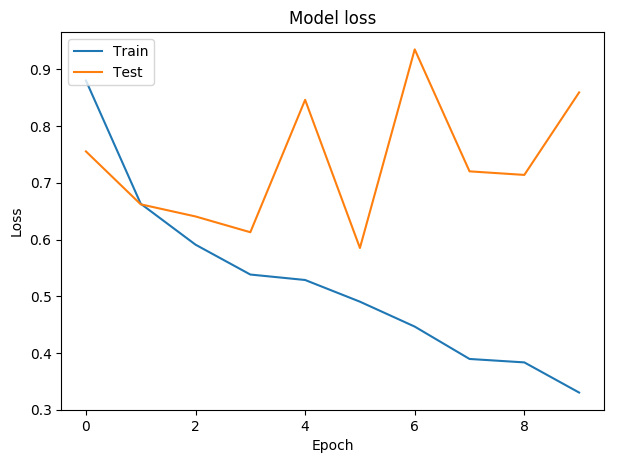

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
pred = model.predict_classes(x_test)

In [31]:
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(y_test_old,pred)
print(cm)

[[ 0  2  0]
 [ 0 15 13]
 [ 0  2 48]]


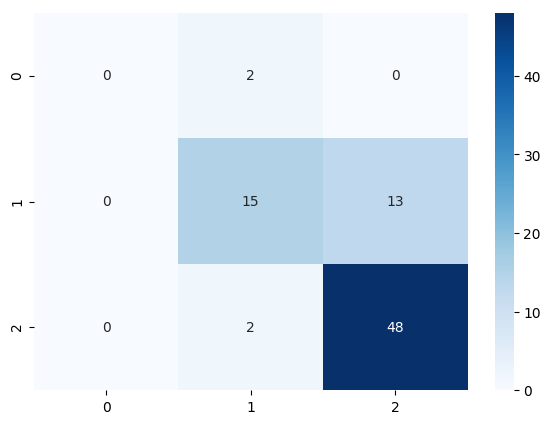

In [32]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cm,annot=True,cmap='Blues', fmt='g')

#### from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(trainxs,
	trainys, test_size=0.1)

# **Testing Gradient boosing regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gradient_boosted = GradientBoostingRegressor()

# Fit the model on the training data
gradient_boosted.fit(trainX, trainY)

# Make predictions on the test data
predictions = gradient_boosted.predict(testX)

# Evaluate the model
mae = np.mean(abs(predictions - testY))

print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)

ValueError: ignored

In [ ]:
print(testY)

In [ ]:
print(predictions)

In [ ]:
plt.plot(testY,predictions,'.')
plt.show()

In [ ]:
np.mean([abs(t-65.13) for t in testY])

# **Testing linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Create the model
linear_regression = LinearRegression()

# Fit the model on the training data
linear_regression.fit(trainX, trainY)

# Make predictions on the test data
predictions1 = linear_regression.predict(testX)

# Evaluate the model
mae = np.mean(abs(predictions1 - testY))

print('Linear regression Performance on the test set: MAE = %0.4f' % mae)

In [ ]:
print(testY)

In [ ]:
print(predictions1)